In [ ]:
#Crime detection

In [ ]:
pip install inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

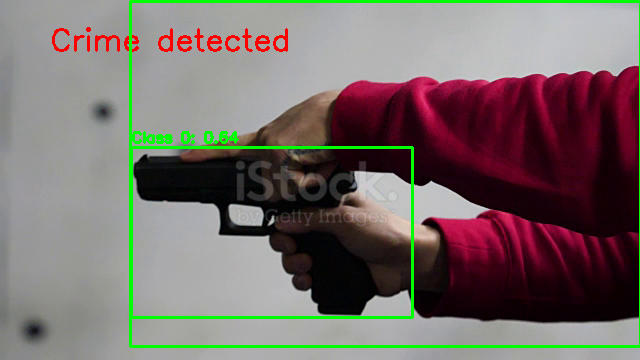

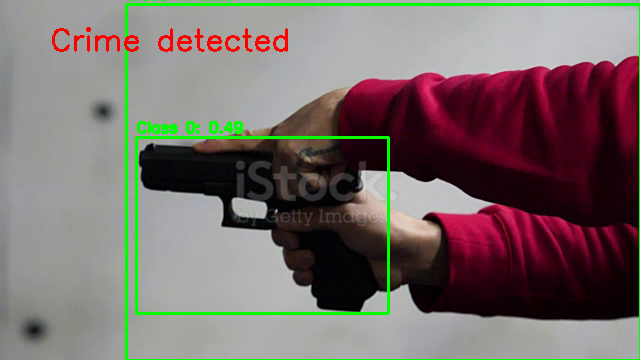

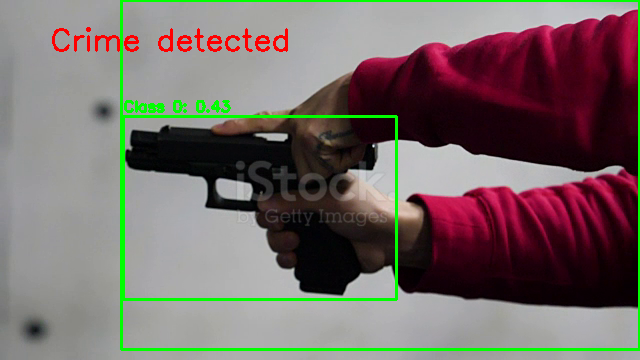

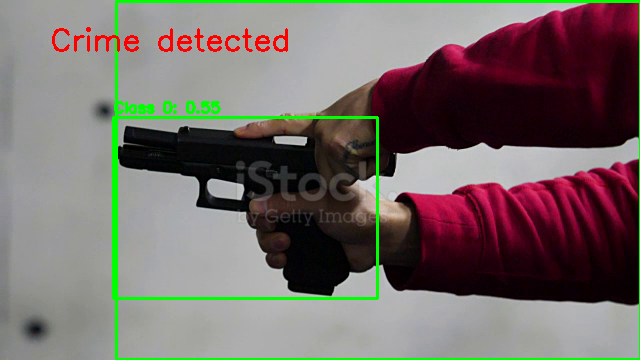

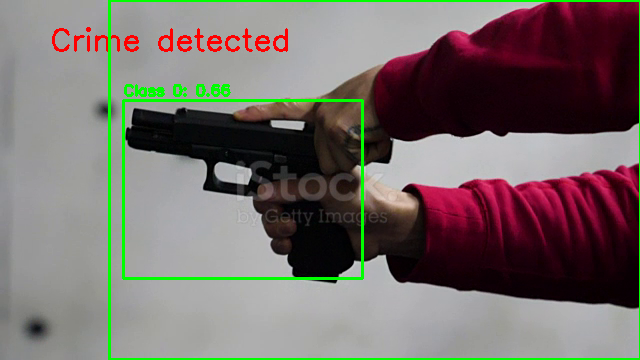

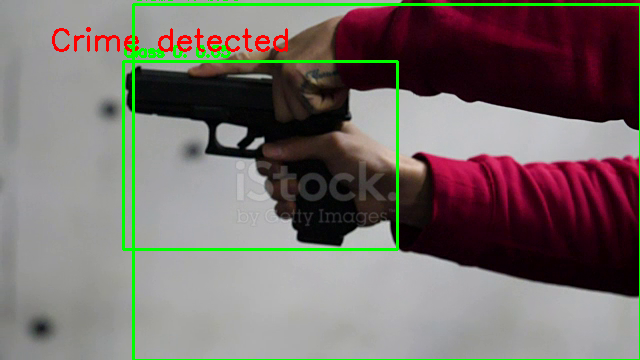

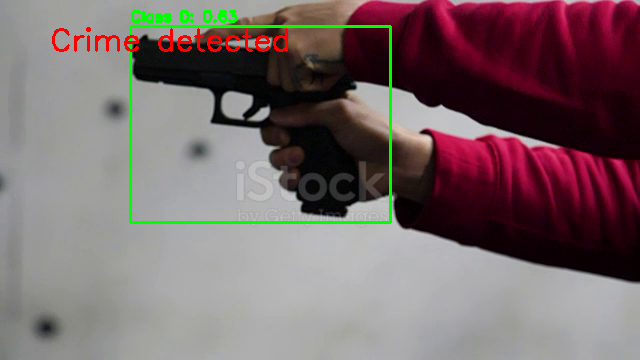

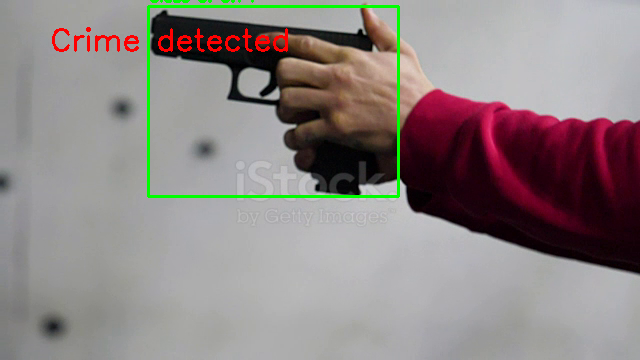

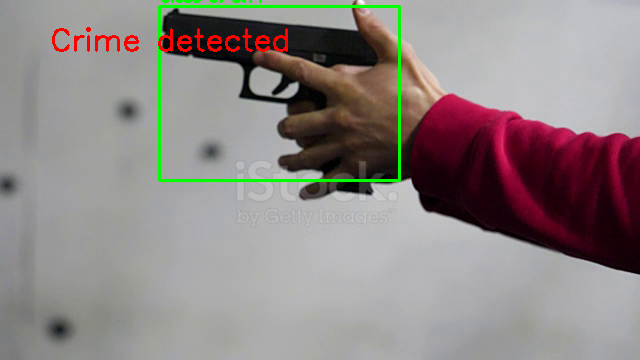

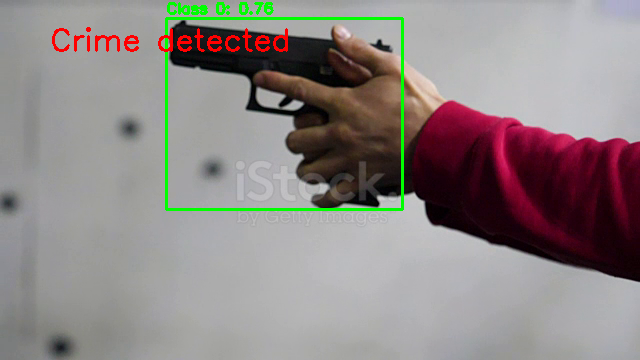

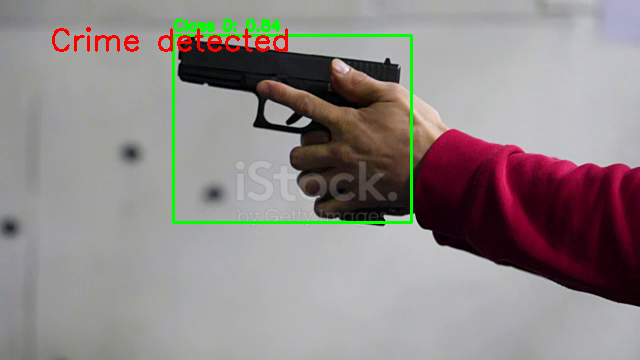

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import inference_sdk

# Initialize the inference client
CLIENT = inference_sdk.InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="etIkQoEiLv96bPu49IEO"
)

def draw_boxes(frame, detection_results):

    for detection in detection_results:
        class_id = detection.get('class_id', 0)
        confidence = detection.get('confidence', 0.0)
        x, y, width, height = detection.get('x', 0), detection.get('y', 0), detection.get('width', 0), detection.get('height', 0)


        x_min, y_min = int(x - width / 2), int(y - height / 2)
        x_max, y_max = int(x + width / 2), int(y + height / 2)


        color = (0, 255, 0)
        thickness = 2
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color, thickness)

        text = f"Class {class_id}: {confidence:.2f}"
        cv2.putText(frame, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

        if class_id == 0:

            cv2.putText(frame, "Crime detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    return frame


video_path = "/content/sample_data/istockphoto-923832544-640_adpp_is.mp4"
cap = cv2.VideoCapture(video_path)

frame_interval = 30

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    if frame_count % frame_interval != 0:
        continue

    result = CLIENT.infer(frame, model_id="crime-detection-oodyj/1")

    frame_with_boxes = draw_boxes(frame, result['predictions'])

    cv2_imshow(frame_with_boxes)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
